Introduction homework assignment

The data that we are using here is the data from the last lecture. 
Descriptive statistics can be found here, as well as a visualisation of the two conditions. 
Finally, there is a test that compares both conditions.


In [2]:
# Packages

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math 
import numpy as np
import pandas as pd
import statistics 

First assignement: loading the data and calculating summary statistics

In [7]:
# Table with summary stats

path = 'C:/Users/veerl/session7_stats/'
participants = pd.read_csv(os.path.join(path, 'participants.csv'))

trials = pd.DataFrame()
for participant_id in participants['id']:
    participant_data = pd.read_csv(f'participants/{participant_id}.csv')
    trials = pd.concat([trials, participant_data]) #make list []

trials = trials.merge(participants, on='id')
trials.rename(columns={'Unnamed: 0': 'trial_order'}, inplace=True)

summary = trials.groupby(by=['id', 'condition']).aggregate(
    mean_RT=pd.NamedAgg('RT', np.mean),
    median_RT=pd.NamedAgg('RT', np.median),
    std_RT=pd.NamedAgg('RT', np.std),
)
summary.reset_index(inplace=True)
summary

,id,condition,mean_RT,median_RT,std_RT
0,24639,baseline,523.639055,516.484661,319.469700
1,24639,condition_a,916.551797,871.753483,545.207917
2,24639,condition_b,460.798286,414.557038,236.760201
3,37321,baseline,424.567080,392.233167,215.411905
4,37321,condition_a,603.750397,574.754631,270.696958
5,37321,condition_b,388.912371,363.278241,182.121480
6,52845,baseline,413.013402,360.641374,219.242907
7,52845,condition_a,686.390174,571.846871,452.023739
8,52845,condition_b,437.927877,358.456438,226.634697
9,59785,baseline,472.227320,386.567990,208.705638


Second assignemnt: visualising the two experimental conditions

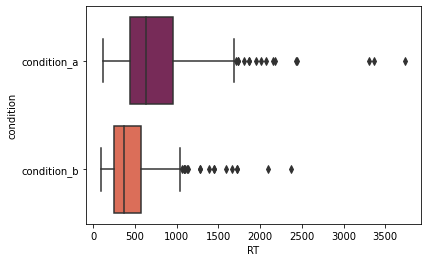

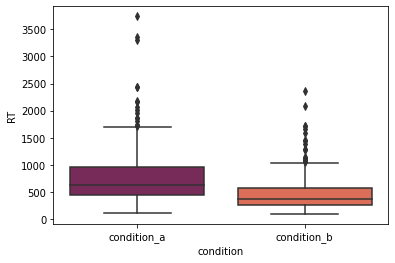

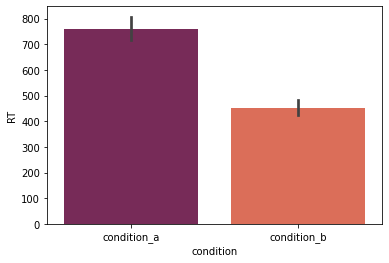

In [39]:
# Plot contrast of interest

sns.boxplot(y='condition', x='RT', data=trials[trials['condition'] != 'baseline'], palette="rocket")
plt.show()

sns.boxplot(y='RT', x='condition', data=trials[trials['condition'] != 'baseline'], palette="rocket")
plt.show()

sns.barplot(y='RT', x='condition', data=trials[trials['condition'] != 'baseline'], palette="rocket")
plt.show()

Third assignment: statistical test to compare the experimental conditions

Ttest_relResult(statistic=12.205167485188877, pvalue=2.4767918471337015e-29)

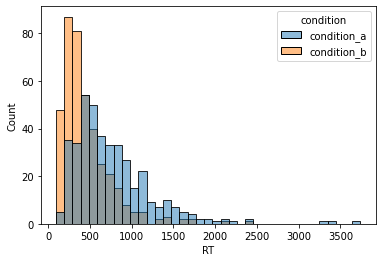

In [40]:
# Statistical test

sns.histplot(trials[trials['condition'] != 'baseline'], x="RT", hue="condition")

# The distribution is skewed so if this were your 'real' data, you would not run stats on this

base1 = trials.loc[trials['condition']=='condition_a', 'RT']
a1 = trials.loc[trials['condition']=='condition_b', 'RT']

stats.ttest_rel(base1,a1, nan_policy='raise')

# statistic=12.205167485188877, pvalue=2.4767918471337015e-29
# significant difference between condition a and b, which most likely means that RTs in condition a are significantly
# slower than in condition b